# A Marshall for Lasair filter output
Show lightcurve and cutouts from given Lasair topic
with option to build veto list (dont show me this object again),
as well as favourite list, each with a reason given. 
Stored on users own machine.

This notebook only works with [Kafka-streamed filters](https://lasair.readthedocs.io/en/main/core_functions/alert-streams.html)

After you change your filter to Kafka streaming, it will take a few days for 
alerts to accumulate.

Find the topic name in your filter page, and change it in the next cell. 
You will also need to understand [how group_id works](https://lasair.readthedocs.io/en/main/core_functions/alert-streams.html).

The `showAttr` list in the cell below should have attributes from the SELECT
part of your filter.

You can now run the last cell of this notebook repeately (the `run()` function), 
until there are no more. You can check the 'veto' box and you won't see that object
again. Similarly with the 'fave' box for favourites. You can write a reason
along with the checkbox. Remember to click button 'Save veto/fave' at the bottom of 
the page to save your choices. Then come back in a day or more and look at more.

In [1]:
# https://lasair-ztf.lsst.ac.uk/filters/log/lasair_2SN-likecandidates/
# https://lasair-ztf.lsst.ac.uk/filters/753/
my_topic     = 'lasair_6ZooniverseTestSN-likecandidatesinlast14days'

# to see the same alerts each time, use a fresh group_id:
import random
group_id     = 'test%d' % random.randrange(0, 10000)
# to see just the new alerts:
group_id     = 'justnewlerts123'

# The list of attributes from the filter that you want to see
showAttr      = ['magrmin', 'rmag', 'classification']

In [2]:
%run Widgets.ipynb
%run ShowCutouts.ipynb
%run ShowPS1.ipynb
%run HandleFilterRow.ipynb

In [3]:
lasairUrl     = "https://lasair-ztf.lsst.ac.uk/"
kafka_server  = 'kafka.lsst.ac.uk:9092'

# Once a pages is finished, just run the last run() cell again for more
alertsPerPage = 10

# Much faster without images
renderImages = False

# This is where the vetos and favourites are stored
vetoFile      = my_topic + 'veto.txt'
faveFile      = my_topic + 'fave.txt'

# settings.py has a single line like
# API_TOKEN = '8c97c954dxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
token         = settings.API_TOKEN

Connected to Kafka
Fetching  ['ZTF22abfmpvz', 'ZTF23abbkvxe', 'ZTF23abcvqkd', 'ZTF23abemunm', 'ZTF23abdgsbw', 'ZTF23abbamlc', 'ZTF22aamguzh', 'ZTF23aahblje', 'ZTF22abazrjk', 'ZTF23aaiuzpc']
Object data fetched in 2 seconds


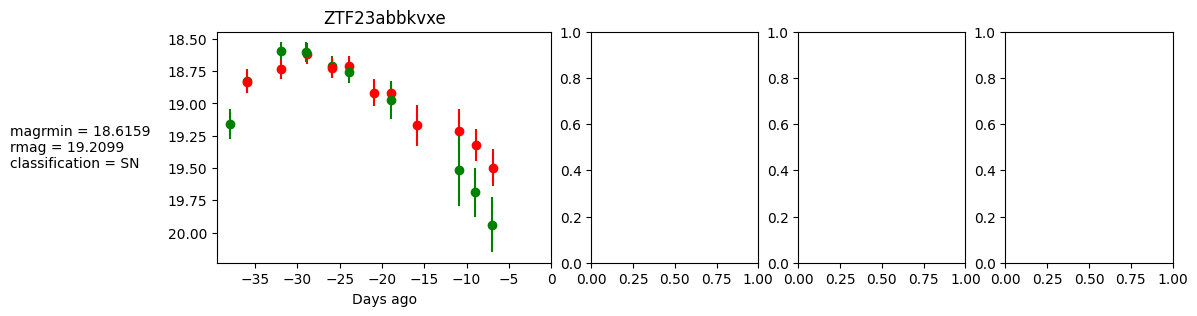

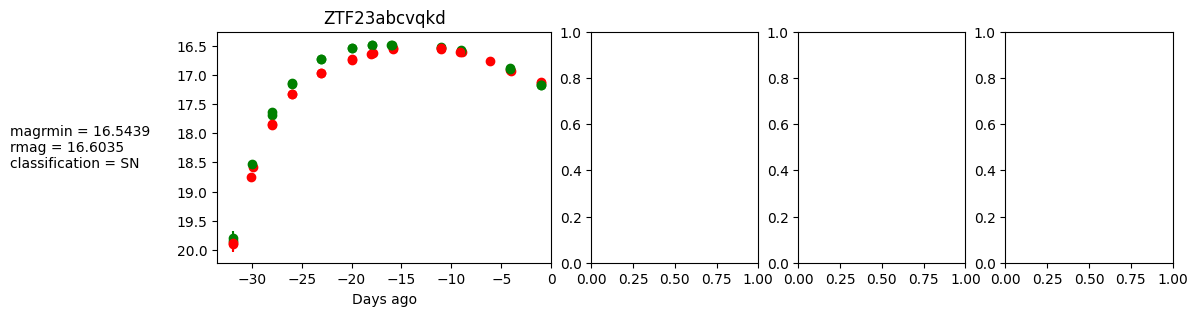

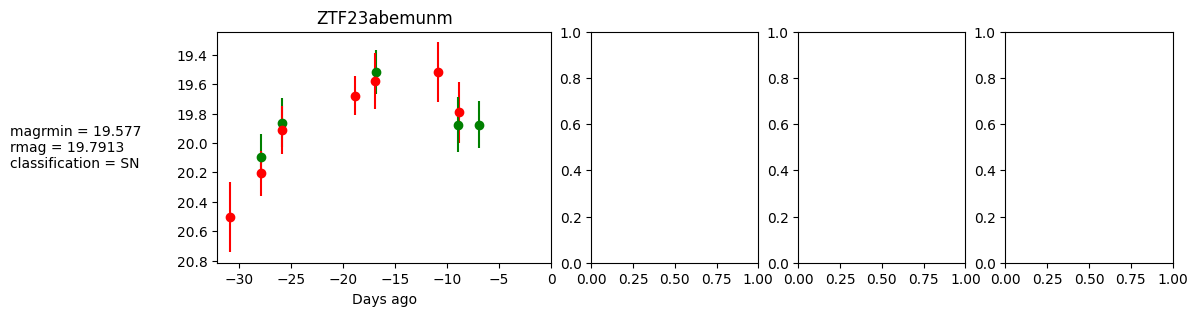

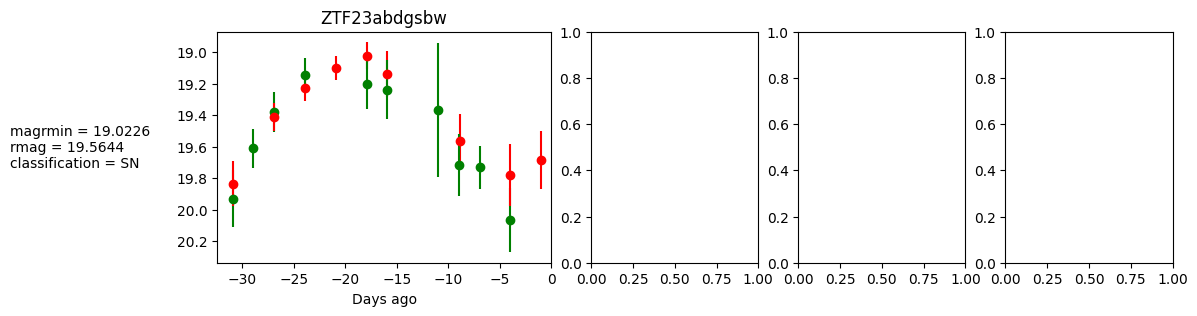

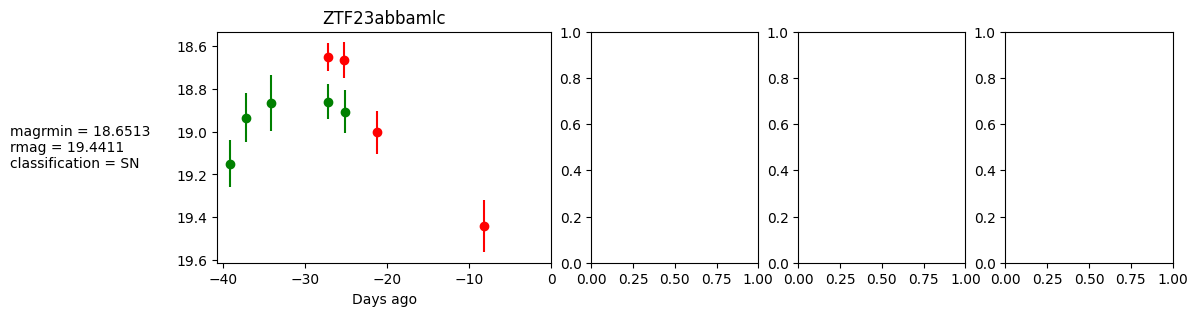

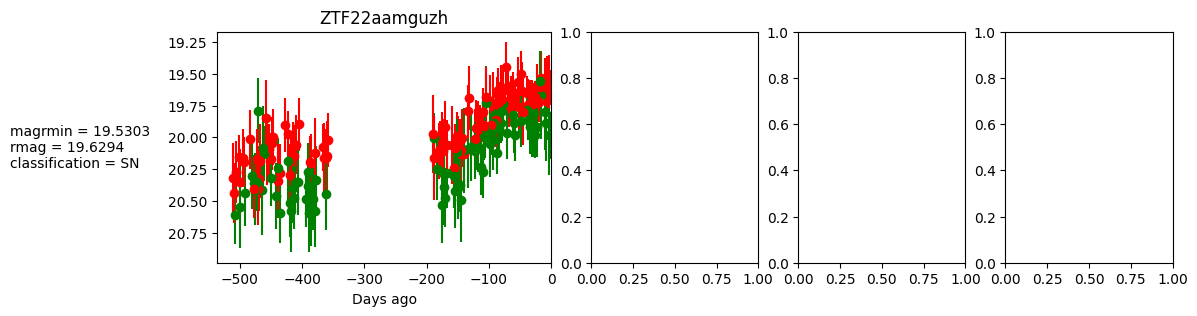

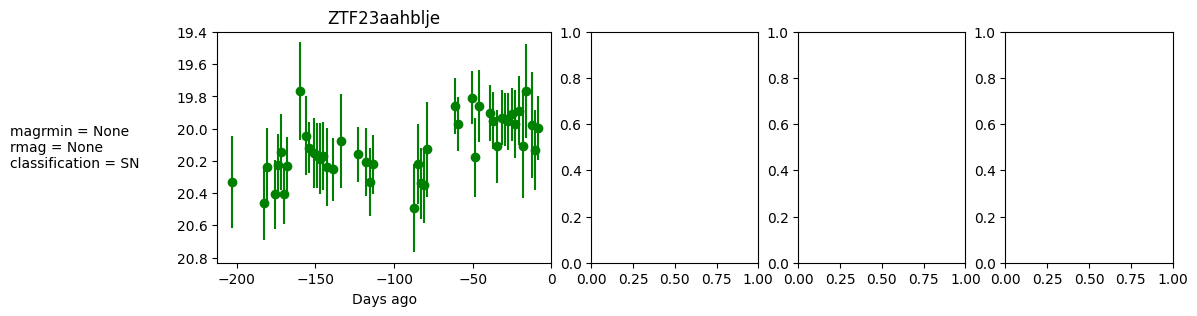

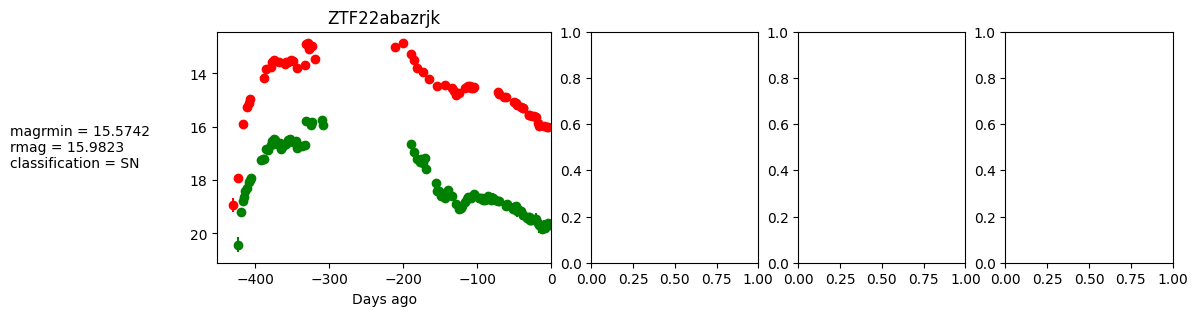

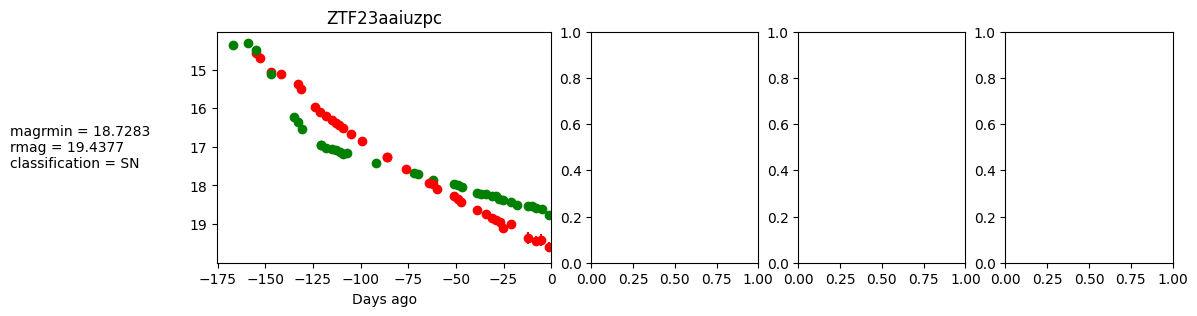

Button(description='Save veto/fave choices', style=ButtonStyle())

In [4]:
run(token, kafka_server, group_id, my_topic, alertsPerPage, renderImages, showAttr)